<a href="https://colab.research.google.com/github/arthurhsalgado/Motion-of-Sedimenting-Particle/blob/main/An%C3%A1lise_da_Sedimenta%C3%A7%C3%A3o_de_Part%C3%ADcula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Análise Linear


##Solução: Rk4 vs Analítica

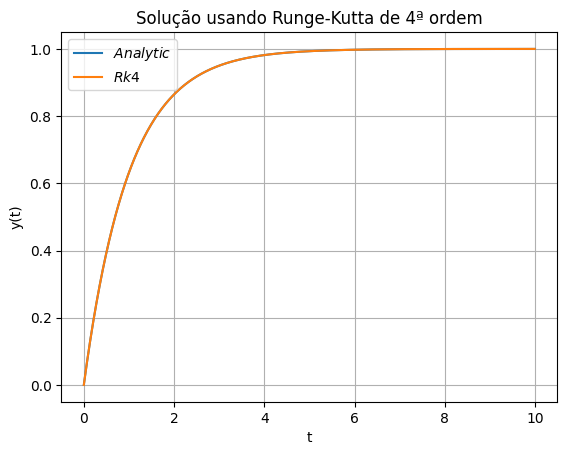

In [6]:
St = 1

def eq(t, y, St):
    dy = -y+1/St
    return dy

def eq_analitica(t, St):
    dy = 1 - np.exp(-t/St)
    return dy

t0 = 0
tf = 10
dt = 0.01

t = np.arange(0, 10, 0.01)
tam = len(t)

solucao = np.zeros(tam)
solucao_analitica = np.zeros(tam)
solucao[0] = 0

for i in range(0, tam-1, 1):

  k1 = eq(t[i], solucao[i], St)
  k2 = eq(t[i] + dt/2, solucao[i]+k1*dt/2, St)
  k3 = eq(t[i] + dt/2, solucao[i]+k2*dt/2, St)
  k4 = eq(t[i] + dt, solucao[i]+k3*dt, St)

  solucao[i+1] = solucao[i] + dt*((k1+2*k2+2*k3+k4)/6)

solucao_analitica = eq_analitica(t, St)

plt.plot(t, solucao_analitica, label=r'$Analitica$')
plt.plot(t, solucao, label=r'$Rk4$')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solução usando Runge-Kutta de 4ª ordem")
plt.grid(True)
plt.legend()
plt.show()

## Comparativo da Influência do Passo Temporal

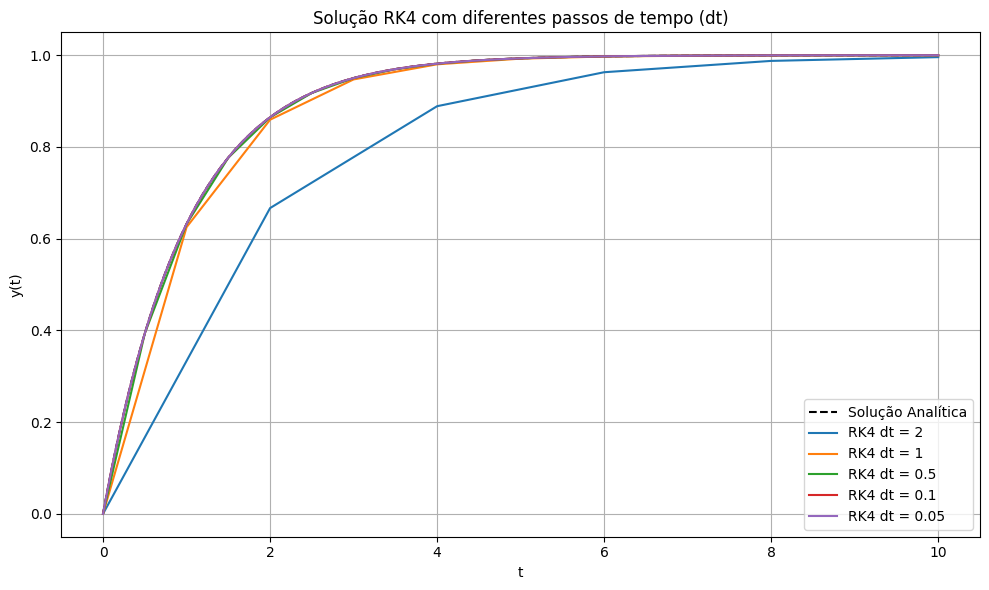

In [ ]:
St = 1

def eq(t, y, St):
    return -y + 1 / St

def eq_analitica(t, St):
    return 1 - np.exp(-t / St)

dt_list = [2, 1, 0.5, 0.1, 0.05]
t0 = 0
tf = 10

t_ref = np.linspace(t0, tf, 1000)
solucao_analitica = eq_analitica(t_ref, St)

plt.figure(figsize=(10, 6))
plt.plot(t_ref, solucao_analitica, 'k--', label='Solução Analítica')


for dt in dt_list:
    t = np.arange(t0, tf + dt, dt)
    tam = len(t)
    solucao = np.zeros(tam)
    solucao[0] = 0

    for i in range(0, tam - 1):
        k1 = eq(t[i], solucao[i], St)
        k2 = eq(t[i] + dt / 2, solucao[i] + k1 * dt / 2, St)
        k3 = eq(t[i] + dt / 2, solucao[i] + k2 * dt / 2, St)
        k4 = eq(t[i] + dt, solucao[i] + k3 * dt, St)

        solucao[i + 1] = solucao[i] + dt * ((k1 + 2 * k2 + 2 * k3 + k4) / 6)

    plt.plot(t, solucao, label=f'RK4 dt = {dt}')

plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solução RK4 com diferentes passos de tempo (dt)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Análise Sedimentação - Análise Não Linear

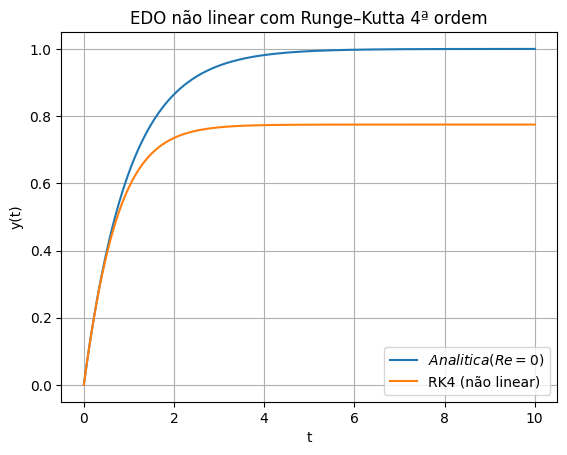

In [ ]:
St = 1.0
Re = 1.0

def eq(t, y, St, Re):
    dy = (-y - (3/8)*Re*y**2 + 1)/St
    return dy

def eq_analitica(t, St):
    dy = 1 - np.exp(-t/St)
    return dy

t0, tf, dt = 0, 10, 0.01
t = np.arange(t0, tf+dt, dt)
tam = len(t)

solucao = np.zeros(tam)
solucao[0] = 0.0  # condição inicial

for i in range(tam-1):
    k1 = eq(t[i], solucao[i], St, Re)
    k2 = eq(t[i] + dt/2, solucao[i] + k1*dt/2, St, Re)
    k3 = eq(t[i] + dt/2, solucao[i] + k2*dt/2, St, Re)
    k4 = eq(t[i] + dt,   solucao[i] + k3*dt, St, Re)
    solucao[i+1] = solucao[i] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

solucao_analitica = np.zeros(tam)
solucao_analitica = eq_analitica(t, St)


plt.plot(t, solucao_analitica, label=r'$Analitica (Re = 0) $')
plt.plot(t, solucao, label='RK4 (não linear)')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("EDO não linear com Runge–Kutta 4ª ordem")
plt.grid(True)
plt.legend()
plt.show()


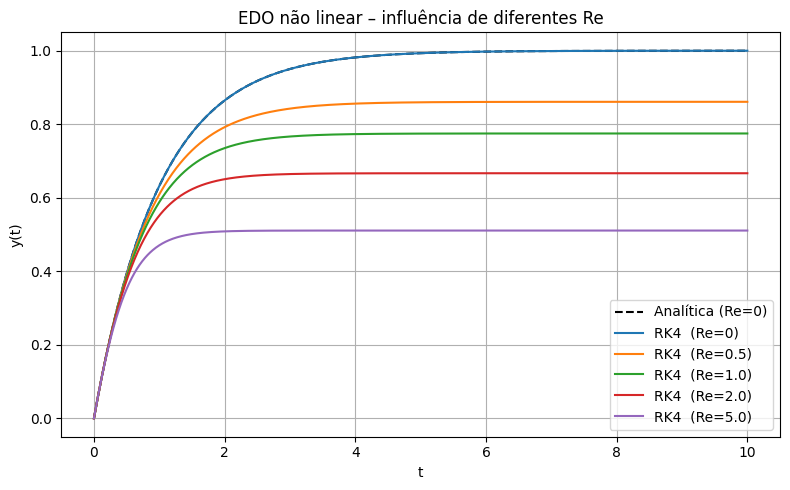

In [ ]:
St = 1.0
Re_list = [0, 0.5, 1.0, 2.0, 5.0]

def eq(t, y, St, Re):
    return (-y - (3/8)*Re*y**2 + 1)/St

def eq_analitica(t, St):
    return 1 - np.exp(-t/St)

t0, tf, dt = 0, 10, 0.01
t = np.arange(t0, tf + dt, dt)
tam = len(t)

plt.figure(figsize=(8,5))

plt.plot(t, eq_analitica(t, St), 'k--', label='Analítica (Re=0)')

for Re in Re_list:
    solucao = np.zeros(tam)
    solucao[0] = 0.0
    for i in range(tam-1):
        k1 = eq(t[i], solucao[i], St, Re)
        k2 = eq(t[i]+dt/2, solucao[i]+k1*dt/2, St, Re)
        k3 = eq(t[i]+dt/2, solucao[i]+k2*dt/2, St, Re)
        k4 = eq(t[i]+dt,   solucao[i]+k3*dt,   St, Re)
        solucao[i+1] = solucao[i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    plt.plot(t, solucao, label=f'RK4  (Re={Re})')

plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("EDO não linear – influência de diferentes Re")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
